# Visualización de las estimaciones del IHME

En este cuaderno se explorarán las series de tiempo de los casos estimados por el IHME y se compararán con las series de los indicadores extraídos de: **GoFundMe**, **Google** y **Twitter**.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
import seaborn as sns
import matplotlib.dates as mdates

In [2]:
# Para usar el estilo por defecto de seaborn
sns.set(rc={'figure.figsize':(11, 5)})
sns.set_style("white") #ponemos el fondo blanco

Cargamos los datos del IHME. Los datos se decargaron de la página de [OurWorldInData](https://ourworldindata.org/grapher/daily-new-estimated-covid-19-infections-ihme-model?country=~VEN) el 11 de mayo de 2021.

In [3]:
df = pd.read_csv('../datos/daily-new-estimated-covid-19-infections-ihme-model.csv', parse_dates = [2])
df_VEN = df[df['Code'] == 'VEN']

df_VEN.head() # visualizamos los datos

,Entity,Code,Day,"Daily new estimated infections of COVID-19 (IHME, mean)","Daily new estimated infections of COVID-19 (IHME, lower)","Daily new estimated infections of COVID-19 (IHME, upper)","Daily new confirmed cases due to COVID-19 (rolling 7-day average, right-aligned)"
89592,Venezuela,VEN,2020-02-22,0.000000,0.000000,0.000000,NaN
89593,Venezuela,VEN,2020-02-23,2.840592,0.194467,16.529363,NaN
89594,Venezuela,VEN,2020-02-24,5.537659,0.950555,26.886904,NaN
89595,Venezuela,VEN,2020-02-25,10.045116,2.718426,33.866749,NaN
89596,Venezuela,VEN,2020-02-26,17.572251,5.755914,48.376716,NaN


 ## Series de tiempo de los datos del IHME

Creamos la serie de tiempo:

In [4]:
series_IHME = df_VEN.set_index('Day').iloc[:,2:] #seleccionamos las columnas que nos interesan para 
                                                 #construir las series de tiempo
series_IHME.head() #visualicemos el resultado

,"Daily new estimated infections of COVID-19 (IHME, mean)","Daily new estimated infections of COVID-19 (IHME, lower)","Daily new estimated infections of COVID-19 (IHME, upper)","Daily new confirmed cases due to COVID-19 (rolling 7-day average, right-aligned)"
Day,,,,
2020-02-22,0.000000,0.000000,0.000000,NaN
2020-02-23,2.840592,0.194467,16.529363,NaN
2020-02-24,5.537659,0.950555,26.886904,NaN
2020-02-25,10.045116,2.718426,33.866749,NaN
2020-02-26,17.572251,5.755914,48.376716,NaN


Y luego la visualizamos:

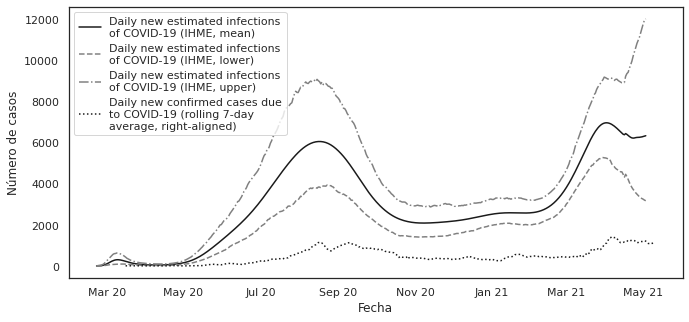

In [5]:
# creamos la figura
fig = plt.figure()
ax = fig.add_subplot(111)

# graficamos los datos del IHME
columnas = series_IHME.columns

#Daily new estimated infections of COVID-19 (IHME, mean)
ax.plot(series_IHME.loc[:, columnas[0]], label = 'Daily new estimated infections\nof COVID-19 (IHME, mean)', ls = '-', 
        color = 'k')
#Daily new estimated infections of COVID-19 (IHME, lower)
ax.plot(series_IHME.loc[:, columnas[1]], label = 'Daily new estimated infections\nof COVID-19 (IHME, lower)', ls = '--', 
        color = 'gray')
#Daily new estimated infections of COVID-19 (IHME, upper)
ax.plot(series_IHME.loc[:, columnas[2]], label = 'Daily new estimated infections\nof COVID-19 (IHME, upper)', ls = '-.', 
        color = 'gray')
#Daily new confirmed cases due to COVID-19 (rolling 7-day average, right-aligned)
ax.plot(series_IHME.loc[:, columnas[3]], 
        label = 'Daily new confirmed cases due\nto COVID-19 (rolling 7-day\naverage, right-aligned)', ls = ':', color = 'k')

ax.set_ylabel('Número de casos')
ax.set_xlabel('Fecha')
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %y'))
ax.legend()
plt.show()

Por último, exportamos la serie de tiempo datos:

In [6]:
series_IHME.to_csv('../datos/series_IHME.csv') #escribimos el df